# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificaci√≥n de im√°genes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y veh√≠culos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la pr√°ctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica c√≥mo activar un entorno con GPUs. *Nota: para leer las im√°genes y estandarizarlas al mismo tama√±o se usa la librer√≠a opencv. Esta ƒ∫ibrer√≠a est√° ya instalada en el entorno de Colab, pero si trabaj√°is de manera local tendr√©is que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 im√°genes a color de 10 clases de animales y veh√≠culos. El dataset en cuesti√≥n se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es m√°s complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y veh√≠culos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ veh√≠culos en pantalla (si bien el elemento a clasificar siempre aparece en la posici√≥n predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

2024-11-13 19:59:28.987688: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:59:29.928300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 19:59:30.478290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731545971.031842   19745 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731545971.151450   19745 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 19:59:32.099752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Primero, definimos los datos de entrenamiento, validaci√≥n y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de n√∫mero de clase a elemento (animal o veh√≠culo).
# La incluimos para ayudarte con la identificaci√≥n de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Funci√≥n auxiliar para convertir las etiquetas a codificaci√≥n one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validaci√≥n y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuaci√≥n se detallan una serie de aspectos orientativos que podr√≠an ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que pod√©is explorar):

*   An√°lisis de los datos a utilizar.
*   An√°lisis de resultados, obtenci√≥n de m√©tricas de *precision* y *recall* por clase y an√°lisis de qu√© clases obtienen mejores o peores resultados.
*   An√°lisis visual de los errores de la red. ¬øQu√© tipo de im√°genes dan m√°s problemas a nuestro modelo?
*   Comparaci√≥n de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilizaci√≥n de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperpar√°metros utilizados, optimizador, uso de t√©cnicas de regularizaci√≥n, *batch normalization*, etc.
*   [ *algo m√°s dif√≠cil* ] Utilizaci√≥n de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es tambi√©n un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gr√°ficas de esos entrenamientos para el an√°lisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluaci√≥n de los datos de test con este modelo**.

#### Iniciemos con una red b√°sica para ir creando familiaridad con las arquitecturas, conceptos y par√°metros


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Vamos con el primer intento en que se probar√° con 3 capas convolucionales y 1 de agrupaci√≥n

In [7]:
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional 
# Se repite este proceso de convoluci√≥n y pooling con capas adicionales para que la red aprenda patrones m√°s complejos.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Estas capas siguen la misma estructura que la primera capa convolucional, pero con m√°s filtros (64 en lugar de 32). 
# Esto permite a la red aprender patrones m√°s detallados a medida que avanzamos en las capas.

# Capa de aplanado, Capas completamente conectadas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Regularizaci√≥n
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-10 14:13:12.003182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Compilaci√≥n del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
epocas = 20

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train_one_hot,
    epochs=epocas,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-10 14:13:15.701215: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
  3/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 49ms/step - accuracy: 0.1311 - loss: 2.3044

2024-11-10 14:13:25.740100: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.740368: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813195: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2024-11-10 14:13:25.813294: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 47ms/step - accuracy: 0.2396 - loss: 2.0234 - val_accuracy: 0.4690 - val_loss: 1.4839
Epoch 2/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 45ms/step - accuracy: 0.4381 - loss: 1.5318 - val_accuracy: 0.5289 - val_loss: 1.2972
Epoch 3/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 45ms/step - accuracy: 0.4984 - loss: 1.3890 - val_accuracy: 0.5697 - val_loss: 1.1972
Epoch 4/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 45ms/step - accuracy: 0.5449 - loss: 1.2837 - val_accuracy: 0.5736 - val_loss: 1.1921
Epoch 5/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 45ms/step - accuracy: 0.5754 - loss: 1.2023 - val_accuracy: 0.6143 - val_loss: 1.0771
Epoch 6/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 45ms/step - accuracy: 0.5931 - loss: 1.1533 - val_accuracy: 0.6279 - val_loss

In [10]:
# Evaluaci√≥n del modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisi√≥n en el conjunto de prueba: {test_accuracy:.4f}")



313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.7145 - loss: 0.8860
Precisi√≥n en el conjunto de prueba: 0.7044


In [11]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensi√≥n compatible



313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step


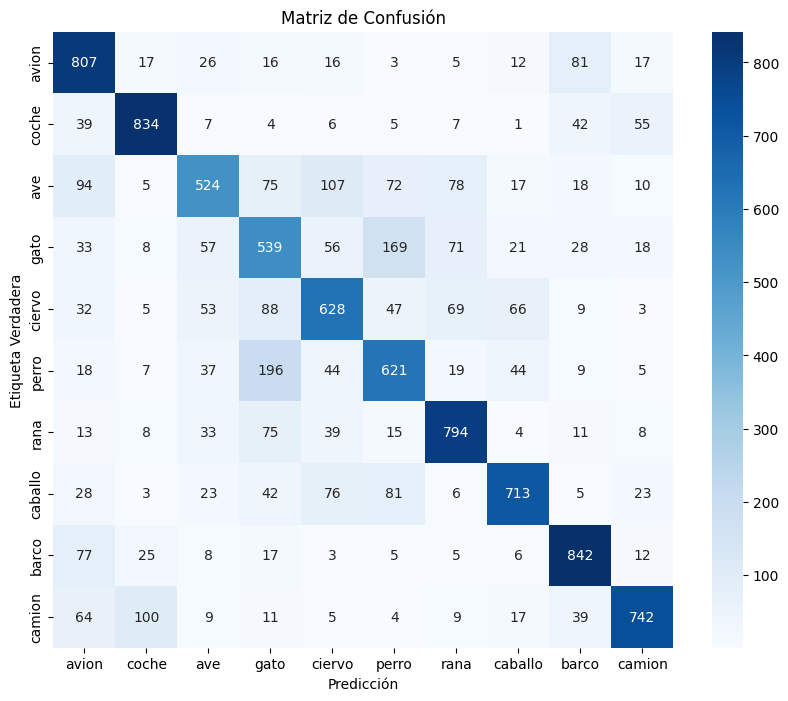

In [12]:
# Matriz de confusi√≥n
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusi√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()



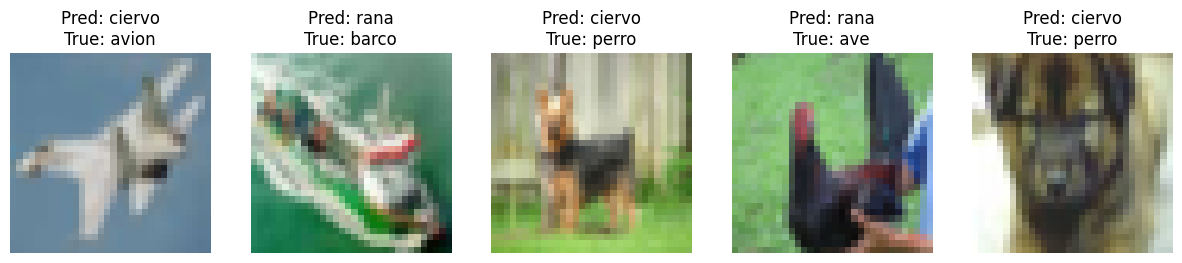

In [13]:
# Visualizaci√≥n de errores
# Encuentra los √≠ndices de las im√°genes donde el modelo fall√≥
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Muestra algunas de las im√°genes mal clasificadas
num_images = 5  # N√∫mero de im√°genes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()



In [14]:
# Reporte de clasificaci√≥n - m√©tricas por clase
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)



              precision    recall  f1-score   support

       avion       0.67      0.81      0.73      1000
       coche       0.82      0.83      0.83      1000
         ave       0.67      0.52      0.59      1000
        gato       0.51      0.54      0.52      1000
      ciervo       0.64      0.63      0.63      1000
       perro       0.61      0.62      0.61      1000
        rana       0.75      0.79      0.77      1000
     caballo       0.79      0.71      0.75      1000
       barco       0.78      0.84      0.81      1000
      camion       0.83      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



### Interpretaci√≥n de la Matriz de Confusi√≥n

El modelo fue evaluado en el conjunto de prueba con 10,000 im√°genes divididas en 10 clases de CIFAR-10. A continuaci√≥n se analiza el rendimiento de cada clase seg√∫n las m√©tricas de **precisi√≥n**, **recall** y **f1-score**.

| Clase       | Precisi√≥n | Recall | F1-Score | Soporte |
|-------------|-----------|--------|----------|---------|
| Avi√≥n       | 0.67      | 0.81   | 0.73     | 1000    |
| Coche       | 0.82      | 0.83   | 0.83     | 1000    |
| Ave         | 0.67      | 0.52   | 0.59     | 1000    |
| Gato        | 0.51      | 0.54   | 0.52     | 1000    |
| Ciervo      | 0.64      | 0.63   | 0.63     | 1000    |
| Perro       | 0.61      | 0.62   | 0.61     | 1000    |
| Rana        | 0.75      | 0.79   | 0.77     | 1000    |
| Caballo     | 0.79      | 0.71   | 0.75     | 1000    |
| Barco       | 0.78      | 0.84   | 0.81     | 1000    |
| Cami√≥n      | 0.83      | 0.74   | 0.78     | 1000    |
| **Promedio General** | **0.71** | **0.70** | **0.70** | **10000** |

### An√°lisis de M√©tricas

1. **Precisi√≥n (Precision)**:
   - La precisi√≥n mide la proporci√≥n de predicciones correctas entre todas las predicciones realizadas para una clase en particular.
   - Las clases con mayor precisi√≥n son **cami√≥n** (0.83), **coche** (0.82), y **barco** (0.78), lo que indica que el modelo es bueno al identificar estas categor√≠as.
   - Las clases con menor precisi√≥n son **gato** (0.51) y **perro** (0.61), lo que sugiere que el modelo tiende a confundir estas clases con otras.

2. **Recall**:
   - El recall mide la proporci√≥n de elementos correctamente identificados en cada clase frente al total de elementos de esa clase en el conjunto de prueba.
   - Las clases con mayor recall son **avi√≥n** (0.81), **barco** (0.84), y **rana** (0.79), lo que significa que el modelo identifica bien estos elementos cuando aparecen.
   - Las clases con menor recall son **ave** (0.52) y **gato** (0.54), lo que indica que muchos elementos de estas clases no fueron correctamente clasificados por el modelo.

3. **F1-Score**:
   - El F1-score es una medida combinada de precisi√≥n y recall. Un valor alto en F1 indica un buen balance entre ambos.
   - Las clases con mejor F1-score son **coche** (0.83) y **barco** (0.81), indicando un rendimiento s√≥lido en estas categor√≠as.
   - Las clases con mnor F1-score son **gato** (0.52) y **ave** (0.59), mostrando que el modelo tiene dificultades en estas clases.

4. **Promedio General**:
   - La precisi√≥n, el recall y el F1-score promedio son aproximadamente 0.70, lo que significa que el modelo tiene un rendimiento moderado en general. No presenta desbalance en estas m√©tricas.
   - **Macro avg** y **weighted avg** est√°n en l√≠nea con la precisi√≥n general del modelo, indicando que el modelo tiene un desempe√±o promedio aceptable en el conjunto de datos, aunque con oportunidades de mejora.

### Observaciones

- El modelo tiene un buen rendimiento en clases con caracter√≠sticas visuales m√°s distintivas, como **cami√≥n**, **coche**, y **barco**.
- Las clases **gato** y **perro** tienen un rendimiento inferior, probablemente debido a la similitud en sus caracter√≠sticas visuales, lo que lleva a confusiones.
- Las clases de animales (por ejemplo, **gato**, **ave**, **perro**) presentan en general menor precisi√≥n y recall en comparaci√≥n con veh√≠culos, lo que sugiere que el modelo tiene dificultades para capturar diferencias sutiles entre diferentes especies de animales.
- Es posible utilizar t√©cnicas como *data augmentatio* pero antes se ajustar√° la arquitectura y si nos d√° el tiempo experimentar con redes preentrenadas, *transfer learning*.

#### Modifiquemos la arquitectura anterior  
Se agregan hasta 128 nucleos o filtros y teniendo cuidado con las dimensiones despu√©s de cada convoluci√≥n y prevenir que las dimensiones se reduzcan demasiado, agregando *padding*.


In [7]:


model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-13 20:01:50.697182: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Entrenamiento de la red
# Entrenar el modelo
epocas = 20
history = model2.fit(
    x_train, y_train_one_hot,
    epochs=epocas,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-11 12:41:54.684904: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
  1/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43:40 4s/step - accuracy: 0.0781 - loss: 5.1601

2024-11-11 12:42:00.478506: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.479529: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.632685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.
2024-11-11 12:42:00.632823: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21528576 exceeds 10% of free system memory.


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 96s 147ms/step - accuracy: 0.3254 - loss: 1.9523 - val_accuracy: 0.5090 - val_loss: 1.3839
Epoch 2/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 92s 148ms/step - accuracy: 0.5195 - loss: 1.3429 - val_accuracy: 0.5850 - val_loss: 1.1723
Epoch 3/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 148s 158ms/step - accuracy: 0.6016 - loss: 1.1205 - val_accuracy: 0.5912 - val_loss: 1.2792
Epoch 4/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 140s 154ms/step - accuracy: 0.6603 - loss: 0.9653 - val_accuracy: 0.6582 - val_loss: 1.0033
Epoch 5/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 104s 167ms/step - accuracy: 0.6931 - loss: 0.8791 - val_accuracy: 0.6608 - val_loss: 0.9940
Epoch 6/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133s 152ms/step - accuracy: 0.7248 - loss: 0.7883 - val_accuracy: 0.6796 

In [10]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test_one_hot)
print(f"Precisi√≥n en el conjunto de prueba: {test_accuracy:.3f}")



313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 14ms/step - accuracy: 0.7317 - loss: 1.0878
Precisi√≥n en el conjunto de prueba: 0.731


Se increment√≥ la precisi√≥n en el conjunto de prueba de 0.7044 a 0.731


#### Matriz de Confusi√≥n y M√©tricas por Clase


In [11]:
# Predicciones del modelo en el conjunto de prueba
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensi√≥n compatible


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 15ms/step


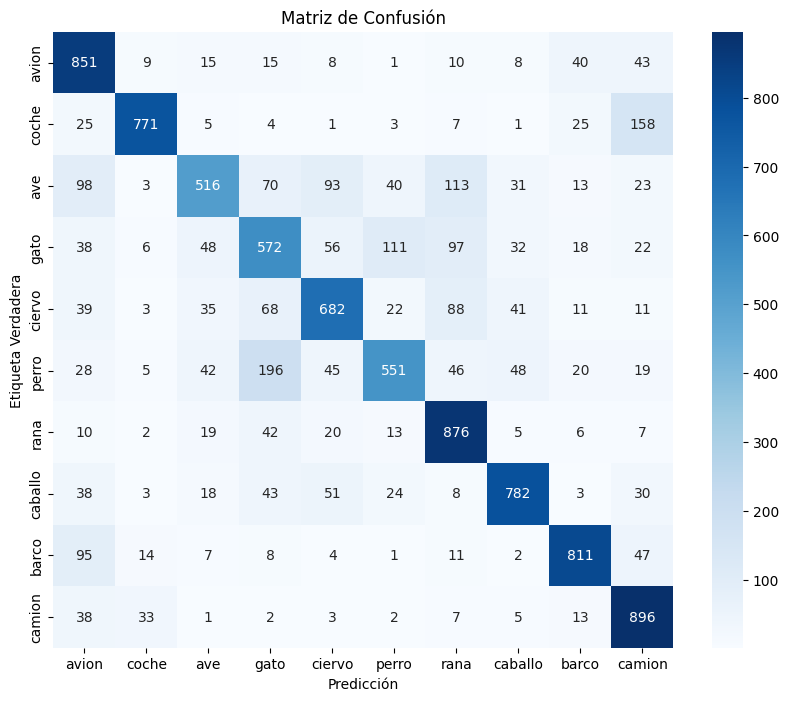

In [12]:
# Matriz de confusi√≥n

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusi√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()



In [13]:
# Reporte de clasificaci√≥n
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.68      0.85      0.75      1000
       coche       0.91      0.77      0.83      1000
         ave       0.73      0.52      0.60      1000
        gato       0.56      0.57      0.57      1000
      ciervo       0.71      0.68      0.69      1000
       perro       0.72      0.55      0.62      1000
        rana       0.69      0.88      0.77      1000
     caballo       0.82      0.78      0.80      1000
       barco       0.84      0.81      0.83      1000
      camion       0.71      0.90      0.79      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



### An√°lisis Comparativo de Resultados tras la Modificaci√≥n de la Arquitectura de la Red Neuronal

Despu√©s de realizar cambios en la arquitectura de la red, agregando hasta 128 filtros y ajustando el *padding* para prevenir la reducci√≥n excesiva de dimensiones, los resultados muestran una mejora general en el rendimiento del modelo en t√©rminos de precisi√≥n, recall y F1-score. A continuaci√≥n se analiza cada clase y el rendimiento global.

#### Tabla de Resultados por Clase

| Clase       | Precisi√≥n | Recall | F1-Score | Soporte |
|-------------|-----------|--------|----------|---------|
| Avi√≥n       | 0.68      | 0.85   | 0.75     | 1000    |
| Coche       | 0.91      | 0.77   | 0.83     | 1000    |
| Ave         | 0.73      | 0.52   | 0.60     | 1000    |
| Gato        | 0.56      | 0.57   | 0.57     | 1000    |
| Ciervo      | 0.71      | 0.68   | 0.69     | 1000    |
| Perro       | 0.72      | 0.55   | 0.62     | 1000    |
| Rana        | 0.69      | 0.88   | 0.77     | 1000    |
| Caballo     | 0.82      | 0.78   | 0.80     | 1000    |
| Barco       | 0.84      | 0.81   | 0.83     | 1000    |
| Cami√≥n      | 0.71      | 0.90   | 0.79     | 1000    |
| **Promedio General** | **0.74** | **0.73** | **0.73** | **10000** |

### An√°lisis de M√©tricas

1. **Precisi√≥n (Precision)**:
   - La precisi√≥n promedio aument√≥ de 0.71 a 0.74, lo que indica una mejora en la capacidad del modelo para realizar predicciones correctas.
   - Las clase que muestra una mejora significativa en precisi√≥n  **coche** (de 0.82 a 0.91) en contraste con **cami√≥n** (de 0.83 a 0.71).

2. **Recall**:
   - El recall promedio aument√≥ de 0.70 a 0.73, reflejando una mayor capacidad del modelo para identificar correctamente las instancias de cada clase.
   - Clases como **avi√≥n** (de 0.81 a 0.85) y **rana** (de 0.79 a 0.88) mostraron una mejora notable en recall, lo cual es positivo, ya que el modelo est√° reconociendo m√°s elementos de estas clases correctamente.

3. **F1-Score**:
   - El F1-score promedio aument√≥ de 0.70 a 0.73, indicando un mejor equilibrio entre precisi√≥n y recall.
   - Clases como **caballo** (de 0.75 a 0.80) logr√≥ mejoras en F1-score, lo que sugiere una mayor efectividad del modelo en esta categor√≠a.

4. **Promedio General**:
   - La precisi√≥n general aument√≥ del 70% al 73%, lo que representa una mejora en la capacidad de clasificaci√≥n del modelo en comparaci√≥n con la versi√≥n anterior.
   - **Macro avg** y **weighted avg** est√°n alineados con el promedio general, indicando un buen rendimiento en el conjunto de datos.

### Observaciones y Conclusiones

- El modelo mejorado muestra una precisi√≥n y recall promedio mayores, especialmente en clases de veh√≠culos como **coche** y **avi√≥n**. Esto sugiere que la adici√≥n de filtros y el uso de *padding* permitieron al modelo aprender mejor las caracter√≠sticas relevantes de estas clases.
- Aunque hay una mejora en general, ciertas clases como **gato** y **ave** a√∫n presentan menores valores de F1-score, lo cual podr√≠a indicar una necesidad de m√°s ajustes en la arquitectura o el uso de t√©cnicas adicionales de *data augmentation* para estas categor√≠as.
- La mejora de las m√©tricas sugiere que el ajuste en el n√∫mero de filtros y el uso adecuado de *padding* ayudaron a estabilizar y mejorar el aprendizaje del modelo sin reducir demasiado las dimensiones de los datos.

### Pr√≥ximos Pasos

Para seguir mejorando el rendimiento, se podr√≠an considerar las siguientes acciones:
1. Aplicar t√©cnicas de *data augmentation* espec√≠ficamente para clases de animales, para mejorar el aprendizaje en clases como **gato** y **ave**.
2. Experimentar con arquitecturas de redes preentrenadas como **ResNet** o **VGG** y ajustar estas redes para el conjunto de datos CIFAR-10.
3. Ajustar los hiperpar√°metros de optimizaci√≥n, como la tasa de aprendizaje, para mejorar la convergencia del modelo.

En general, la red mejorada muestra un rendimiento m√°s s√≥lido, con un aumento en precisi√≥n y recall promedio, logrando una clasificaci√≥n m√°s efectiva en el conjunto de datos CIFAR-10.






In [14]:
# Encuentra los √≠ndices de las im√°genes donde el modelo fall√≥
misclassified_indices = np.where(y_pred_classes != y_true)[0]

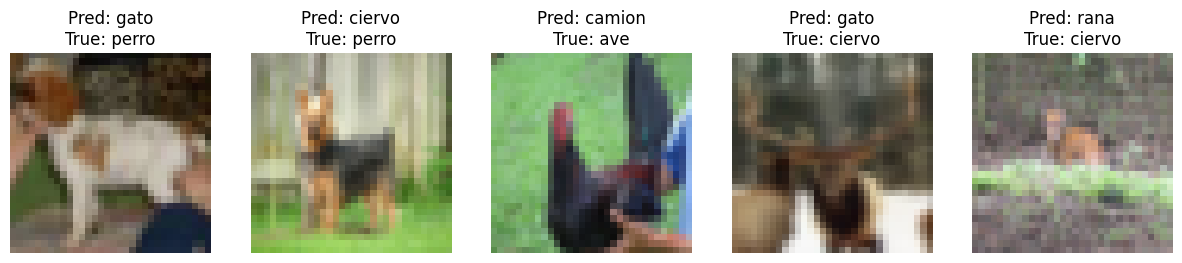

In [15]:

num_images = 5  # N√∫mero de im√°genes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()


#### Iniciemos con la recomendaci√≥n de mejora: 'Data Augmentation'


#### Entrenar el Modelo usando Data Augmentation

En lugar de pasar directamente el conjunto de datos de entrenamiento al modelo, ahora usaremos el generador de im√°genes. Esto permite al modelo ver una nueva versi√≥n alterada de cada imagen en cada √©poca, haciendo el entrenamiento m√°s robusto.


In [14]:
# Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el generador
datagen = ImageDataGenerator(
    rotation_range=20,# Rotaci√≥n aleatoria de la imagen en el rango de 20 grados
    width_shift_range=0.2, # Traslaci√≥n horizontal aleatoria de la imagen en el rango de 20% de la imagen
    height_shift_range=0.2, # Traslaci√≥n vertical aleatoria de la imagen en el rango de 20% de la imagen
    horizontal_flip=True, # Volteo horizontal aleatorio de la imagen
    #shew_range=0.2, # Deformaci√≥n aleatoria de la imagen
    zoom_range=0.2 # Zoom aleatorio de la imagen
)

# Ajustamos el generador a los datos de entrenamiento
datagen.fit(x_train)

# Entrenamos el modelo con el generador
history = model2.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=64),
    epochs=epocas,
    validation_data=(x_valid, y_valid_one_hot)
)




/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 143ms/step - accuracy: 0.2461 - loss: 2.1100

2024-11-12 20:27:22.053205: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99s 151ms/step - accuracy: 0.2462 - loss: 2.1097 - val_accuracy: 0.4458 - val_loss: 1.5624
Epoch 2/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 93s 149ms/step - accuracy: 0.3508 - loss: 1.7522 - val_accuracy: 0.4763 - val_loss: 1.4255
Epoch 3/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112s 180ms/step - accuracy: 0.4117 - loss: 1.6029 - val_accuracy: 0.3975 - val_loss: 1.8811
Epoch 4/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 132s 164ms/step - accuracy: 0.4547 - loss: 1.5006 - val_accuracy: 0.5071 - val_loss: 1.3974
Epoch 5/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 100s 160ms/step - accuracy: 0.4919 - loss: 1.4058 - val_accuracy: 0.5937 - val_loss: 1.1469
Epoch 6/20
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144s 163ms/step - accuracy: 0.5201 - loss: 1.3456 - val_accuracy: 0.6351 

In [15]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test_one_hot)


2024-11-12 21:05:17.540149: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 14ms/step - accuracy: 0.7143 - loss: 0.8497


#### Upss, Esto no funcion√≥ como esperaba
As√≠ es que se probar√° con "Transfer Learning". Para ello se utilizar√° el modelo preentrenado 'MobilNet'. MobileNet es una arquitectura dise√±ada para funcionar eficientemente en dispositivos m√≥viles y de baja potencia, por esta raz√≥n intentaremos probarla desde un equipo local.


### Transfer Learning

In [8]:
# importar hub de tensorflow para utilizar MobilNet
import tensorflow_hub as hub
import tensorflow as tf


In [9]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Resizing, Lambda
from tensorflow.keras.models import Model

# URL del modelo preentrenado
url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
base_model = hub.KerasLayer(url, trainable=False)

# Construir el modelo utilizando la API funcional
inputs = tf.keras.Input(shape=(32, 32, 3))
x = Resizing(224, 224)(inputs)  # Redimensionar a 224x224
x = Lambda(lambda img: base_model(img))(x)
outputs = Dense(10, activation='softmax')(x)  # A√±adir la capa de salida
model = Model(inputs, outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [10]:
model.summary()


Model: "functional_13"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)      ‚îÇ (None, 32, 32, 3)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ resizing (Resizing)             ‚îÇ (None, 224, 224, 3)    ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lambda (Lambda)                 ‚îÇ (None, 1001)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 10)             ‚îÇ        10,020 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 10,020 (39.14 KB)

 Trainable params: 10,020 (39.14 KB)

 Non-trainable params: 0 (0.00 B)

#### Explicaci√≥n detallada de la arquitectura
1. Capa de Entrada (input_layer_8): Define la entrada del modelo, en este caso con forma (32, 32, 3).

2. Redimensionamiento (resizing_2): Redimensiona la entrada de (32, 32, 3) a (224, 224, 3) para que coincida con el tama√±o de entrada que MobileNetV2 espera.

3. Capa Lambda (lambda): Esta capa encapsula el modelo preentrenado MobileNetV2.

    Aunque el modelo MobileNetV2 realiza una serie de operaciones internas (con capas convolucionales, capas de pooling, etc.), estas no se muestran en model.summary().
    La salida de esta capa es (None, 1001), ya que el modelo MobileNetV2 original fue entrenado para clasificar en 1,001 categor√≠as.

4. Capa Densa (dense_7): A√±ade una capa Dense final con 10 neuronas para tu clasificaci√≥n personalizada en 10 clases.


In [11]:
# Entrenar el modelo, dadas las limitaciones de m√°quina, se entrena solo por 5 √©pocas

history = model.fit(
    x_train, y_train_one_hot,
    epochs= 5,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-13 20:04:33.637713: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/5


2024-11-13 20:04:40.134481: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.543247: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.613208: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 128450560 exceeds 10% of free system memory.
2024-11-13 20:04:40.710641: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 77070336 exceeds 10% of free system memory.


625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1413s 2s/step - accuracy: 0.7358 - loss: 0.8027 - val_accuracy: 0.8447 - val_loss: 0.4466
Epoch 2/5
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1285s 2s/step - accuracy: 0.8574 - loss: 0.4109 - val_accuracy: 0.8565 - val_loss: 0.4116
Epoch 3/5
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1382s 2s/step - accuracy: 0.8677 - loss: 0.3833 - val_accuracy: 0.8648 - val_loss: 0.3897
Epoch 4/5
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1270s 2s/step - accuracy: 0.8726 - loss: 0.3683 - val_accuracy: 0.8607 - val_loss: 0.3986
Epoch 5/5
625/625 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1278s 2s/step - accuracy: 0.8771 - loss: 0.3590 - val_accuracy: 0.8597 - val_loss: 0.4101


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisi√≥n en el conjunto de prueba: {test_accuracy:.3f}")


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 263s 840ms/step - accuracy: 0.8574 - loss: 0.4247
Precisi√≥n en el conjunto de prueba: 0.858


#### Wow, nada mal. 
Veamos las m√©tricas a nivel de cada categor√≠a

In [15]:
# Matriz de confusi√≥n
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Matriz de confusi√≥n
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensi√≥n compatible





313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 243s 773ms/step


NameError: name 'confusion_matrix' is not defined

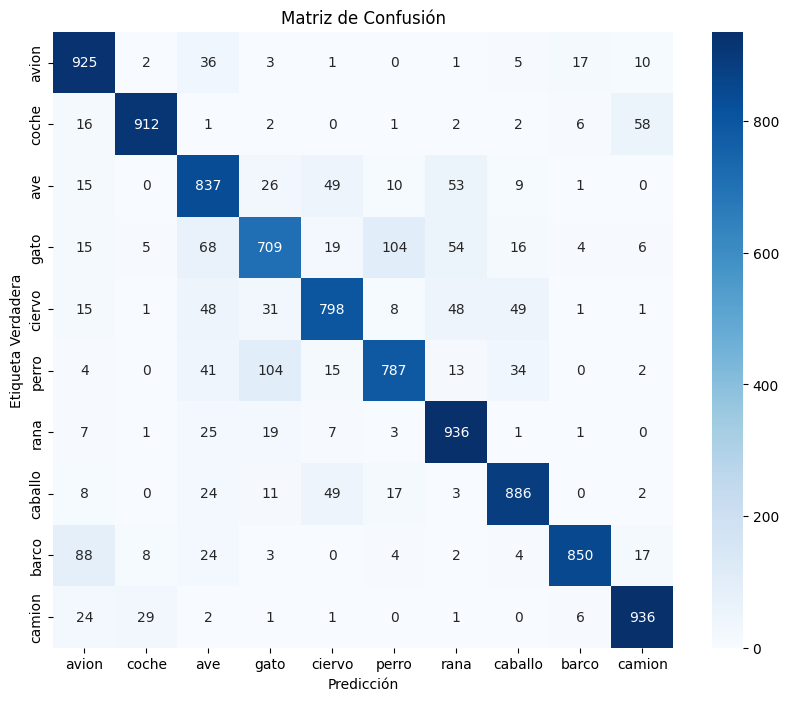

In [16]:
# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusi√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicci√≥n")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusi√≥n")
plt.show()


In [17]:
# Reporte de clasificaci√≥n
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.83      0.93      0.87      1000
       coche       0.95      0.91      0.93      1000
         ave       0.76      0.84      0.79      1000
        gato       0.78      0.71      0.74      1000
      ciervo       0.85      0.80      0.82      1000
       perro       0.84      0.79      0.81      1000
        rana       0.84      0.94      0.89      1000
     caballo       0.88      0.89      0.88      1000
       barco       0.96      0.85      0.90      1000
      camion       0.91      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Story Telling


# **De los Primeros Pasos al √âxito: Una Historia de Aprendizaje con Redes Convolucionales**

El mundo de las redes neuronales convolucionales (CNN) es un vasto campo lleno de oportunidades y desaf√≠os. Para muchos, embarcarse en este viaje significa aceptar que cada intento es un paso hacia la excelencia, una lecci√≥n invaluable que perfecciona tanto el conocimiento t√©cnico como la capacidad para interpretar datos. Aqu√≠ comienza nuestra historia, utilizando el conjunto de datos **CIFAR-10**, un est√°ndar en la clasificaci√≥n de im√°genes, y explorando diversas arquitecturas de CNN en la b√∫squeda del mejor ajuste.

---

## **Cap√≠tulo 1: El Comienzo - Simplicidad y Primeros Logros**

El primer modelo fue una introducci√≥n sencilla pero poderosa al mundo de las CNN. Con capas convolucionales y de pooling b√°sicas, este modelo demostr√≥ que incluso una arquitectura modesta puede aprender patrones significativos.

### **Arquitectura**:
- Dos capas convolucionales con 32 y 64 filtros, activaci√≥n ReLU y max pooling.
- Una capa completamente conectada con 64 neuronas y regularizaci√≥n con dropout.
- Una salida softmax para las 10 clases de CIFAR-10.

### **Resultados**:
- **Precisi√≥n global**: **70%**.
- Las clases como **cami√≥n** (precisi√≥n: 83%) y **coche** (precisi√≥n: 82%) destacaron, mientras que clases m√°s complejas como **gato** (precisi√≥n: 51%) y **ave** (precisi√≥n: 67%) mostraron limitaciones.

El mensaje era claro: las capas iniciales eran efectivas, pero el modelo ten√≠a dificultades para captar patrones m√°s sutiles en im√°genes de animales. 

---

## **Cap√≠tulo 2: Profundizando la Complejidad**

Con el aprendizaje del primer intento, se dise√±√≥ una arquitectura m√°s sofisticada. Se introdujeron:
- **Batch normalization** para estabilizar el aprendizaje.
- M√°s filtros (hasta 128) para capturar detalles m√°s finos.
- Uso de padding para preservar las dimensiones espaciales.

### **Resultados**:
- **Precisi√≥n global**: **73%**.
- Mejora significativa en clases como **rana** (de 75% a 88% de recall) y **caballo** (de 75% a 80% en F1-score).
- Clases como **gato** y **ave** siguieron siendo desafiantes, pero mostraron ligeras mejoras.

El modelo m√°s profundo captur√≥ patrones m√°s complejos y detallados, pero a√∫n hab√≠a margen de mejora. Fue una lecci√≥n de c√≥mo la optimizaci√≥n progresiva puede mejorar la capacidad de generalizaci√≥n.

---

## **Cap√≠tulo 3: Experimentando con Data Augmentation**

El tercer intento busc√≥ aumentar la robustez del modelo mediante **data augmentation**, simulando variaciones en las im√°genes como rotaciones, traslaciones y volteos. Esto deb√≠a preparar al modelo para manejar mejor datos reales.

### **Resultados**:
- **Precisi√≥n global**: **71.4%**, sin mejoras significativas respecto al segundo modelo.

Esta experiencia subray√≥ que las t√©cnicas como data augmentation no garantizan siempre un salto inmediato en el rendimiento, pero a√∫n as√≠ fortalecen la capacidad del modelo para enfrentar datos en escenarios m√°s variados. Estoy seguro que si tuviese mayor capacidad de m√°quina, uso de GPUs, por ejemplo, puede permitir mejorar estos resultados. Trabaj√© desde mi m√°quina, por terquedad e irreverencia con google colab, pero estoy convencido que utilizando computo en la nube, insisto, se pueden tener mejores resultados.

---

## **Cap√≠tulo 4: La Revoluci√≥n del Transfer Learning**

Finalmente, se decidi√≥ dar un gran salto al mundo del **Transfer Learning**, utilizando **MobileNetV2**, un modelo preentrenado en el masivo conjunto de datos **ImageNet**. Este enfoque trajo el poder del aprendizaje previo, reutilizando caracter√≠sticas generales ya aprendidas.

### **Resultados**:
- **Precisi√≥n global**: **86%**.
- Clases como **avi√≥n** (93%), **coche** (91%) y **rana** (94%) alcanzaron niveles sobresalientes de precisi√≥n.
- Incluso clases complicadas como **gato** lograron un F1-score del 74%, mostrando una mejora considerable.

Esta arquitectura no solo super√≥ los l√≠mites previos, sino que demostr√≥ el potencial del aprendizaje transferido. MobileNetV2 brind√≥ una base s√≥lida para tareas espec√≠ficas sin necesidad de entrenar desde cero.

---

## **Reflexi√≥n Final: Aprender Haciendo**

Esta traves√≠a en el aprendizaje pr√°ctico con redes neuronales convolucionales me dej√≥ una lecci√≥n clara: cada intento, √©xito o fallo, refuerza nuestra comprensi√≥n. Comenzar con una arquitectura b√°sica me ense√±√≥ los fundamentos; profundizar con capas adicionales mostr√≥ la importancia del dise√±o; experimentar con data augmentation nme record√≥ la complejidad del ajuste fino; y adoptar Transfer Learning evidenci√≥ el poder del trabajo previo.

Vaya, el viaje de aprender con CIFAR-10 no fue solo un entendimiento sobre modelos y m√©tricas, sino sobre la relevancia del proceso, celebrar cada peque√±o avance y transformar los desaf√≠os en hitos hacia el dominio de la inteligencia artificial. Voy paso a paso, hasta ahora lento pero con confianza.

¬°Este es solo el principio de un futuro lleno de posibilidades! üöÄ

